# <font color='orange'>Titanic</font>
<font color='orange'>Matej Šembera, 25.2.2023</font>

***
<br>

**Introduction:** This project is my solution to the competition called Titanic, which is accessible on Kaggle. 

__[link to the competition](https://www.kaggle.com/competitions/titanic/overview)__

**Goal:** In this competition we will try to predict if the passenger survives the Titanic disaster using machine learning. 

**Sections**: Before we will dive in the machine learning we will try to explore and prepare the data. To make this notebook transparent, I divided it into several parts. <br>

1. Introduction<br>
2. Importing libraries
3. Data cleaning
4. Predicting age
5. Machine learning

**Result**: We predicted if passanger survives or not with 76.555% accuracy.

# <font color='orange'>1. Introduction</font>

In my opinion, it's a good idea to understand the most important variables before diving into this competition. To do so, we need to consider the situation in which passengers were during the Titanic tragedy.
<br>
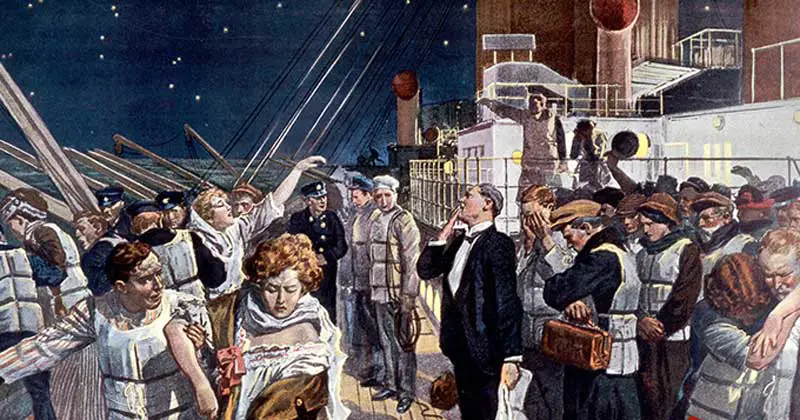
Source: Encyklopedia Titanica, Painter: Fortunino Matania
<br>

One of the most significant factors was the "women and children first" policy, which prioritized the safety of women and children. As a result, 75% of women survived, while only 31.5% of passengers overall made it. Moreover, being a child significantly increased survival rates, as 51.1% of children survived. It's worth noting that a person was considered a child if they were 12 years old or younger.
<br>
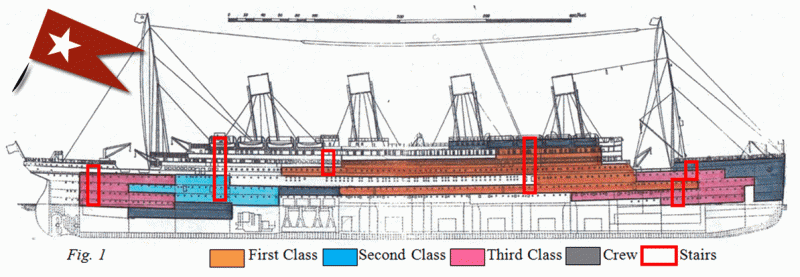
Source: Encyklopedia Titanica
<br>
<br>
When we examine the picture above, another essential variable becomes apparent. The first-class passengers were closer to the deck where the lifeboats were, and they had a higher chance of survival than lower-class passengers. Thus, a passenger's class was also a critical factor in survival.

So the most essential variables is gender, class and age. Let's dive into competition!


## <font color='orange'>2. Importing libraries</font>

In [9]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

#importing data
data = pd.read_csv("C:\\Users\\sembm\\OneDrive\\Dokumenty\\Data_Science\\Files\\Titanic_train.csv")
data_test = pd.read_csv("C:\\Users\\sembm\\OneDrive\\Dokumenty\\Data_Science\\Files\\Titanic_test.csv")

data_df = pd.DataFrame(data)
data_test_df = pd.DataFrame(data_test)

In [10]:
data_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data_test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Now when we have some basic understanding of the file, we will progress to data cleaning phase.

## <font color='orange'>3. Data cleaning</font>

The first column of our dataframe is PassengerId, which can affect our machine learning model. We will drop the column. 

In [12]:
data_df = data_df.drop("PassengerId", axis = 1)
data_test_df = data_test_df.drop("PassengerId", axis = 1)
data_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we will focus on missing data.

In [13]:
missing_data = data_df.isnull().sum()
missing_data = missing_data.sort_values(ascending=False)
print(missing_data)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64


Text(0.5, 1.0, 'Missing values heatmap')

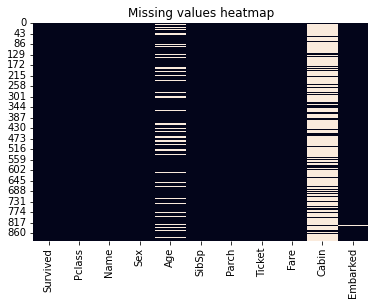

In [14]:
sns.heatmap(data_df.isnull(), cbar = False).set_title("Missing values heatmap")

As we can see we are lucky that there isn't much data missing. It looks like the age columns is evenly distributed. Now we will clean the date in order to create correlation matrix.

In [15]:
#converting Name column into string, so that we can create a new column Title
data_df["Name"] = data_df["Name"].astype("string")
data_df['Title'] = data_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
data_test_df["Name"] = data_test_df["Name"].astype("string")
data_test_df['Title'] = data_test_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

#creating Fare per person column
data_df["FarePerPassenger"] = data_df["Fare"] / (data_df["SibSp"] + data_df["Parch"] + 1)
#test data
data_test_df["FarePerPassenger"] = data_test_df["Fare"] / (data_test_df["SibSp"] + data_test_df["Parch"] + 1)

#creating new column cabin letter
data_df["Cabin"] = data_df["Cabin"].astype("string")
data_df["Cabin Letter"] = data_df["Cabin"].str[0]
#test data
data_test_df["Cabin"] = data_test_df["Cabin"].astype("string")
data_test_df["Cabin Letter"] = data_test_df["Cabin"].str[0]

#replacing missing values in Cabin column by U (unknown)
data_df["Cabin Letter"] = data_df["Cabin Letter"].fillna("U")
data_test_df["Cabin Letter"] = data_test_df["Cabin Letter"].fillna("U")

data_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FarePerPassenger,Cabin Letter
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S,Mr,3.62500,U
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,35.64165,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,Miss,7.92500,U
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,26.55000,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S,Mr,8.05000,U


In [16]:
#dropping Name, Cabin and ticket columns
data_df_drop = data_df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
data_test_df_drop = data_test_df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
data_df_drop.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FarePerPassenger,Cabin Letter
0,0,3,male,22.0,1,0,7.2500,S,Mr,3.62500,U
1,1,1,female,38.0,1,0,71.2833,C,Mrs,35.64165,C
2,1,3,female,26.0,0,0,7.9250,S,Miss,7.92500,U
3,1,1,female,35.0,1,0,53.1000,S,Mrs,26.55000,C
4,0,3,male,35.0,0,0,8.0500,S,Mr,8.05000,U


In [17]:
#replacing 0 for male and 1 for female
data_df_drop["Sex"] = data_df_drop["Sex"].replace("female", 0)
data_df_drop["Sex"] = data_df_drop["Sex"].replace("male", 1)
data_df_drop["Sex"] = data_df_drop["Sex"].astype("int64")

#test data
data_test_df_drop["Sex"] = data_test_df_drop["Sex"].replace("female", 0)
data_test_df_drop["Sex"] = data_test_df_drop["Sex"].replace("male", 1)
data_test_df_drop["Sex"] = data_test_df_drop["Sex"].astype("int64")

#replacing Embarked
data_df_drop["Embarked"] = data_df_drop["Embarked"].replace("S", 0)
data_df_drop["Embarked"] = data_df_drop["Embarked"].replace("C", 1)
data_df_drop["Embarked"] = data_df_drop["Embarked"].replace("Q", 2)
data_df_drop["Sex"] = data_df_drop["Sex"].astype("int64")

#test data
data_test_df_drop["Embarked"] = data_test_df_drop["Embarked"].replace("S", 0)
data_test_df_drop["Embarked"] = data_test_df_drop["Embarked"].replace("C", 1)
data_test_df_drop["Embarked"] = data_test_df_drop["Embarked"].replace("Q", 2)
data_test_df_drop["Sex"] = data_test_df_drop["Sex"].astype("int64")

#replacing cabin
data_df_drop["Cabin Letter"] = data_df_drop["Cabin Letter"].astype("object")
x = 0
for letter in ["A", "B", "C", "D", "E", "F", "G", "T", "U"]:
    data_df_drop["Cabin Letter"] = data_df_drop["Cabin Letter"].replace(letter, x)
    x = x + 1
data_df_drop["Cabin Letter"] = data_df_drop["Cabin Letter"].astype("int64")

#test data
data_test_df_drop["Cabin Letter"] = data_test_df_drop["Cabin Letter"].astype("object")
x = 0
for letter in ["A", "B", "C", "D", "E", "F", "G", "T", "U"]:
    data_test_df_drop["Cabin Letter"] = data_test_df_drop["Cabin Letter"].replace(letter, x)
    x = x + 1
data_test_df_drop["Cabin Letter"] = data_test_df_drop["Cabin Letter"].astype("int64")

#replacing Title column
y = 0
for letter in data_df_drop["Title"].unique():
    data_df_drop["Title"] = data_df_drop["Title"].replace(letter, y)
    y = y + 1
data_df_drop["Title"] = data_df_drop["Title"].astype("int64")

#test data
y = 0
for letter in data_test_df_drop["Title"].unique():
    data_test_df_drop["Title"] = data_test_df_drop["Title"].replace(letter, y)
    y = y + 1
data_test_df_drop["Title"] = data_test_df_drop["Title"].astype("int64")

#there will be still two missing value in the Embarked column. We will fill them
embarked_mode = data_df_drop['Embarked'].mode()[0]
data_df_drop['Embarked'] = data_df_drop['Embarked'].fillna(embarked_mode)


data_test_df_drop.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FarePerPassenger,Cabin Letter
0,3,1,34.5,0,0,7.8292,2,0,7.829200,8
1,3,0,47.0,1,0,7.0000,0,1,3.500000,8
2,2,1,62.0,0,0,9.6875,2,0,9.687500,8
3,3,1,27.0,0,0,8.6625,0,0,8.662500,8
4,3,0,22.0,1,1,12.2875,0,1,4.095833,8


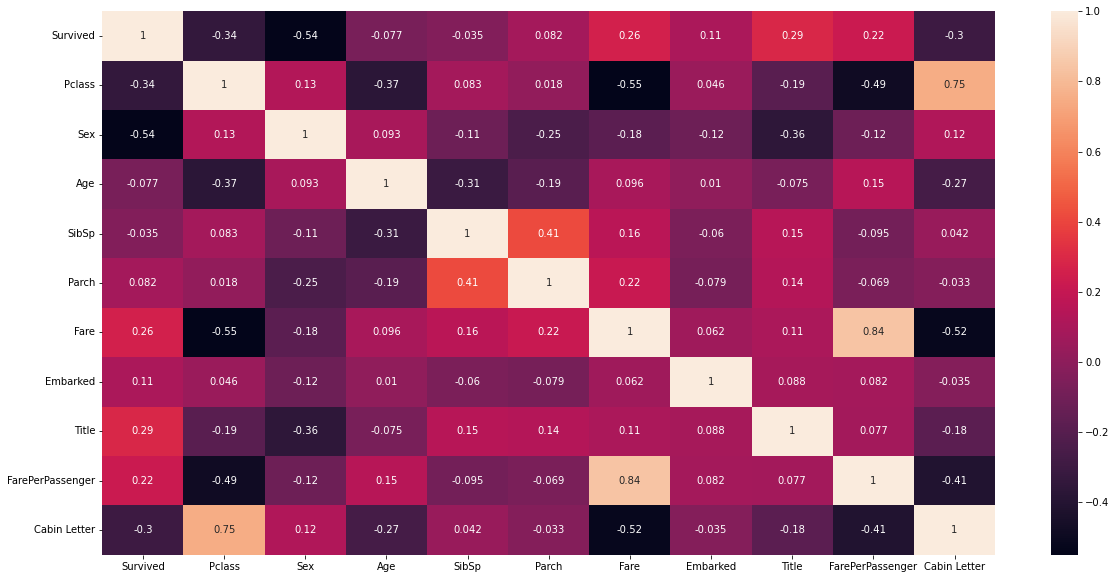

In [18]:
corrMatrix = data_df_drop.corr()
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
missing_data_2 = data_df_drop.isnull().sum().sort_values(ascending=False)
print(missing_data_2)

Age                 177
Survived              0
Pclass                0
Sex                   0
SibSp                 0
Parch                 0
Fare                  0
Embarked              0
Title                 0
FarePerPassenger      0
Cabin Letter          0
dtype: int64


In [20]:
missing_data = data_test_df_drop.isnull().sum()
missing_data = missing_data.sort_values(ascending=False)
print(missing_data)

Age                 86
Fare                 1
FarePerPassenger     1
Pclass               0
Sex                  0
SibSp                0
Parch                0
Embarked             0
Title                0
Cabin Letter         0
dtype: int64


In the test set there is one missing value in FarePerPassanger, Fare columns. We will fill it. 

In [21]:
median = data_test_df_drop["FarePerPassenger"].median()
data_test_df_drop["FarePerPassenger"] = data_test_df_drop["FarePerPassenger"].fillna(median)

median2 = data_test_df_drop["Fare"].median()
data_test_df_drop["Fare"] = data_test_df_drop["Fare"].fillna(median2)

We will now start dropping some columns. We can drop the Fare, Cabin Letter column, since Fare is already represented in the FarePerPassanger column and there are a lot of missing values in Cabin letter column.

In [22]:
data_df_drop2 = data_df_drop.drop(['Fare', 'Cabin Letter'], axis=1)
data_test_df_drop2 = data_test_df_drop.drop(['Fare', 'Cabin Letter'], axis=1)

Now we will convert values in FarePerPassenger into bins. The reason is that we 

In [24]:
data_df_drop2["FarePerPassenger"].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: FarePerPassenger, dtype: float64

In [25]:
#dividing the FarePerPassenger column into bins
data_df_drop2.loc[data_df_drop2["FarePerPassenger"] < 7.3, 'bin'] = 1
data_df_drop2.loc[(data_df_drop2["FarePerPassenger"] >= 7.3) & (data_df_drop2["FarePerPassenger"] < 23.66), 'bin'] = 2
data_df_drop2.loc[data_df_drop2["FarePerPassenger"] >= 23.66, 'bin'] = 3

#test data
data_test_df_drop2.loc[data_test_df_drop2["FarePerPassenger"] < 7.3, 'bin'] = 1
data_test_df_drop2.loc[(data_test_df_drop2["FarePerPassenger"] >= 7.3) & (data_test_df_drop2["FarePerPassenger"] < 23.66), 'bin'] = 2
data_test_df_drop2.loc[data_test_df_drop2["FarePerPassenger"] >= 23.66, 'bin'] = 3


data_df_drop2.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FarePerPassenger,bin
0,0,3,1,22.0,1,0,0.0,0,3.62500,1.0
1,1,1,0,38.0,1,0,1.0,1,35.64165,3.0
2,1,3,0,26.0,0,0,0.0,2,7.92500,2.0


In [26]:
#renaming bin column to FareBin
data_df_drop2 = data_df_drop2.rename(columns={'bin': 'FareBin'})
data_test_df_drop2 = data_test_df_drop2.rename(columns={'bin': 'FareBin'})

#dropping FarePerPassenger column
data_df_drop3 = data_df_drop2.drop('FarePerPassenger', axis=1)
data_test_df_drop3 = data_test_df_drop2.drop('FarePerPassenger', axis=1)

data_df_drop3.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FareBin
0,0,3,1,22.0,1,0,0.0,0,1.0
1,1,1,0,38.0,1,0,1.0,1,3.0
2,1,3,0,26.0,0,0,0.0,2,2.0
3,1,1,0,35.0,1,0,0.0,1,3.0
4,0,3,1,35.0,0,0,0.0,0,2.0


In [27]:
#converting Embarked and Bin column into int
data_df_drop3['Embarked'] = data_df_drop3['Embarked'].astype(int)
data_df_drop3['FareBin'] = data_df_drop3['FareBin'].astype(int)

#test data
data_test_df_drop3['Embarked'] = data_test_df_drop3['Embarked'].astype(int)
data_test_df_drop3['FareBin'] = data_test_df_drop3['FareBin'].astype(int)

In [28]:
#creating IsAlone column
data_df_drop3['IsAlone'] = (data_df_drop3['SibSp'] + data_df_drop3['Parch'] == 0).astype(int)
data_test_df_drop3['IsAlone'] = (data_test_df_drop3['SibSp'] + data_test_df_drop3['Parch'] == 0).astype(int)

In [29]:
#dropping the SibSp and Parch columns
data_df_drop4 = data_df_drop3.drop(['SibSp', 'Parch'], axis=1)
data_test_df_drop4 = data_test_df_drop3.drop(['SibSp', 'Parch'], axis=1)

In [30]:
data_df_drop4.head(5)

,Survived,Pclass,Sex,Age,Embarked,Title,FareBin,IsAlone
0,0,3,1,22.0,0,0,1,0
1,1,1,0,38.0,1,1,3,0
2,1,3,0,26.0,0,2,2,1
3,1,1,0,35.0,0,1,3,0
4,0,3,1,35.0,0,0,2,1


In [31]:
data_test_df_drop4.head(5)

,Pclass,Sex,Age,Embarked,Title,FareBin,IsAlone
0,3,1,34.5,2,0,2,1
1,3,0,47.0,0,1,1,0
2,2,1,62.0,2,0,2,1
3,3,1,27.0,0,0,2,1
4,3,0,22.0,0,1,1,0


## <font color='orange'>4. Using machine learning to predict age column</font>

As we now the fact that being child increases the survival chance. But there are a lot of missing values in the age column. We will try to predict that column using Random Forest regression. We assume that the Random Forest algorithm will work better than K-Nearest neighbors algorithm. The reason is that the Nearest neighbors will be the family members, which does not help us to determine the age. 

In [32]:
#splitting the dataframe
missing_age = data_df_drop4[data_df_drop4['Age'].isnull()]
not_missing_age = data_df_drop4[~data_df_drop4['Age'].isnull()]

#test data
missing_age_test = data_test_df_drop4[data_test_df_drop4['Age'].isnull()]
not_missing_age_test = data_test_df_drop4[~data_test_df_drop4['Age'].isnull()]
missing_age.head(5)

,Survived,Pclass,Sex,Age,Embarked,Title,FareBin,IsAlone
5,0,3,1,NaN,2,0,2,1
17,1,2,1,NaN,0,0,2,1
19,1,3,0,NaN,1,1,1,1
26,0,3,1,NaN,1,0,1,1
28,1,3,0,NaN,2,2,2,1


In [33]:
missing_age_2 = missing_age.drop('Survived', axis=1)
not_missing_age_2 = not_missing_age.drop('Survived', axis=1)
not_missing_age_2.head(5)

,Pclass,Sex,Age,Embarked,Title,FareBin,IsAlone
0,3,1,22.0,0,0,1,0
1,1,0,38.0,1,1,3,0
2,3,0,26.0,0,2,2,1
3,1,0,35.0,0,1,3,0
4,3,1,35.0,0,0,2,1


In [34]:
Survived_missing = missing_age['Survived']
Survived_not_missing = not_missing_age['Survived']
Survived_missing.head(5)

5     0
17    1
19    1
26    0
28    1
Name: Survived, dtype: int64

In [35]:
# splitting the dataset into training and testing sets
X = not_missing_age_2.drop('Age', axis=1)
y = not_missing_age_2['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training a random forest regression model
model = RandomForestRegressor(n_estimators=200, random_state=42, min_samples_split = 10, min_samples_leaf = 1, max_features = 'log2', max_depth= 10, bootstrap= True)
model.fit(X_train, y_train)

# making predictions on the training set and calculate the MAE
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print('Training MAE:', mae_train)

# making predictions on the testing set and calculate the MAE
y_test_pred = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Testing MAE:', mae_test)

Training MAE: 8.153990108918283
Testing MAE: 8.031988688900242


In [36]:
#Using the algorithm to predict the missing values in the 'Age' column of the 'not_missing_age' DataFrame
missing_age_2['Age'] = model.predict(missing_age_2.drop('Age', axis=1))

# Concatenating the missing_age and not_missing_age DataFrames back together in the original order
cols = list(data_df_drop4.columns)

#geeting back the survived column
missing_age_2['Survived'] = Survived_missing
not_missing_age_2['Survived'] = Survived_not_missing

new_df = pd.concat([not_missing_age_2[cols], missing_age_2[cols]])

new_df.head(5)

,Survived,Pclass,Sex,Age,Embarked,Title,FareBin,IsAlone
0,0,3,1,22.0,0,0,1,0
1,1,1,0,38.0,1,1,3,0
2,1,3,0,26.0,0,2,2,1
3,1,1,0,35.0,0,1,3,0
4,0,3,1,35.0,0,0,2,1


In [37]:
#test data
missing_age_test['Age'] = model.predict(missing_age_test.drop('Age', axis=1))


cols = list(data_test_df_drop4.columns)
new_df_test = pd.concat([not_missing_age_test[cols], missing_age_test[cols]])

new_df_test.head(5)

C:\Users\sembm\AppData\Local\Temp\ipykernel_18572\82893917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_age_test['Age'] = model.predict(missing_age_test.drop('Age', axis=1))


,Pclass,Sex,Age,Embarked,Title,FareBin,IsAlone
0,3,1,34.5,2,0,2,1
1,3,0,47.0,0,1,1,0
2,2,1,62.0,2,0,2,1
3,3,1,27.0,0,0,2,1
4,3,0,22.0,0,1,1,0


Great. Now we will create a new column called Child, that is 0 when the person is not a child and 1 if the person is the child. 

In [38]:
#creating bins in the Age column
new_df.loc[new_df["Age"] < 12, 'bin'] = 1
new_df.loc[(new_df["Age"] >= 12) & (new_df["Age"] < 18), 'bin'] = 2
new_df.loc[(new_df["Age"] >= 18) & (new_df["Age"] < 37), 'bin'] = 3
new_df.loc[(new_df["Age"] >= 37) & (new_df["Age"] < 60), 'bin'] = 4
new_df.loc[new_df["Age"] >= 60, 'bin'] = 5

#test data
new_df_test.loc[new_df_test["Age"] < 12, 'bin'] = 1
new_df_test.loc[(new_df_test["Age"] >= 12) & (new_df_test["Age"] < 18), 'bin'] = 2
new_df_test.loc[(new_df_test["Age"] >= 18) & (new_df_test["Age"] < 37), 'bin'] = 3
new_df_test.loc[(new_df_test["Age"] >= 37) & (new_df_test["Age"] < 60), 'bin'] = 4
new_df_test.loc[new_df_test["Age"] >= 60, 'bin'] = 5

#renaming the bin column into AgeBin
new_df = new_df.rename(columns={'bin': 'AgeBin'})
new_df_test = new_df_test.rename(columns={'bin': 'AgeBin'})

#converting the AgeBin column into int
new_df['AgeBin'] = new_df['AgeBin'].astype(int)
new_df_test['AgeBin'] = new_df_test['AgeBin'].astype(int)

#dropping the Age column
new_df = new_df.drop('Age', axis=1)
new_df_test = new_df_test.drop('Age', axis=1)

new_df.head(5)

,Survived,Pclass,Sex,Embarked,Title,FareBin,IsAlone,AgeBin
0,0,3,1,0,0,1,0,3
1,1,1,0,1,1,3,0,4
2,1,3,0,0,2,2,1,3
3,1,1,0,0,1,3,0,3
4,0,3,1,0,0,2,1,3


In [39]:
new_df_test.head(5)

,Pclass,Sex,Embarked,Title,FareBin,IsAlone,AgeBin
0,3,1,2,0,2,1,3
1,3,0,0,1,1,0,4
2,2,1,2,0,2,1,5
3,3,1,0,0,2,1,3
4,3,0,0,1,1,0,3


## <font color='orange'>5. Using machine learning to predicts who survives</font>

K-Nearest Neighbors Algorithm

In [40]:
X = new_df.drop("Survived", axis=1).values
y = new_df["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

#calculating score on the train set
score2 = knn.score(X_train, y_train)
print('Train score', score2)

#calculating score on the test set
score2 = knn.score(X_test, y_test)
print('Test score', score2)

Train score 0.85553772070626
Test score 0.8134328358208955


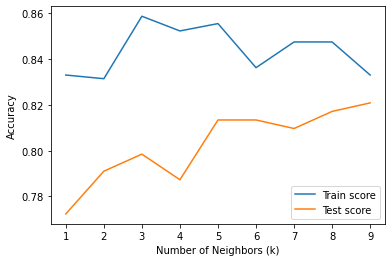

In [42]:
# Initializing empty lists for scores
train_scores = []
test_scores = []

# Looping over different values of k
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plotting the scores for different values of k
plt.plot(range(1, 10), train_scores, label='Train score')
plt.plot(range(1, 10), test_scores, label='Test score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now we will try random forest classifier. 

In [43]:
# Creating a Random Forest classifier
rf = RandomForestClassifier(random_state=42, max_depth=4)

# Fitting the grid search to the training data
rf.fit(X_train, y_train)

# Getting the best hyperparameters and score on the test set
test_score = rf.score(X_test, y_test)

# Getting the best hyperparameters and score on the train set
train_score = rf.score(X_train, y_train)

# Printing the best hyperparameters and test score
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.8394863563402889
Test score: 0.8097014925373134


In [44]:
# Creating a decision tree classifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3, min_samples_split=6)

# Fitting the grid search to the training data
dt.fit(X_train, y_train)

# Getting the best hyperparameters and score on the test set
test_score = dt.score(X_test, y_test)
train_score = dt.score(X_train, y_train)

# Printing the best hyperparameters and test score
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.8539325842696629
Test score: 0.8059701492537313


In [45]:
predictions = rf.predict(new_df_test)
output_df = pd.DataFrame({'Survived': predictions})
output_df['PassengerId'] = range(892, 1310)
output_df = output_df.reindex(columns=['PassengerId', 'Survived'])
output_df.head(5)
output_df.to_csv('submission_Titanic2_Rf2.csv', index=False)

C:\Users\sembm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
